# Setting Up a CFA


## Why a Confirmatory Analysis?

Benefits of a confirmatory analysis:

- Explicitly specified variable/factor relationships
- Testing a theory that you know in advance
- This is the right thing to publish when you are developing a new measure!


While the purpose of exploratory factor analysis is to explore every possible variable-factor relationship, the purpose of confirmatory factor analysis explicitly specifies variable-factor relationship with the purpose of testing theories thta you know in advance.

While some journals will want an exploratory analysis to describe the process used, most will prefer to have just the confirmatory analysis results.

## Packages

In [14]:
library(psych)
library(tidyverse)
library(sem)

## Dataset

In [43]:
data(bfi)
bfi <- bfi[, 1:25]

In [44]:
# Establish two sets of indices to split the dataset
N <- nrow(bfi)
indices <- seq(1, N)
indices_EFA <- sample(indices, floor((.5*N)))
indices_CFA <- indices[!(indices %in% indices_EFA)]

# Use those indices to split the dataset into halves for your EFA and CFA
bfi_EFA <- bfi[indices_EFA, ]
bfi_CFA <- bfi[indices_CFA, ]

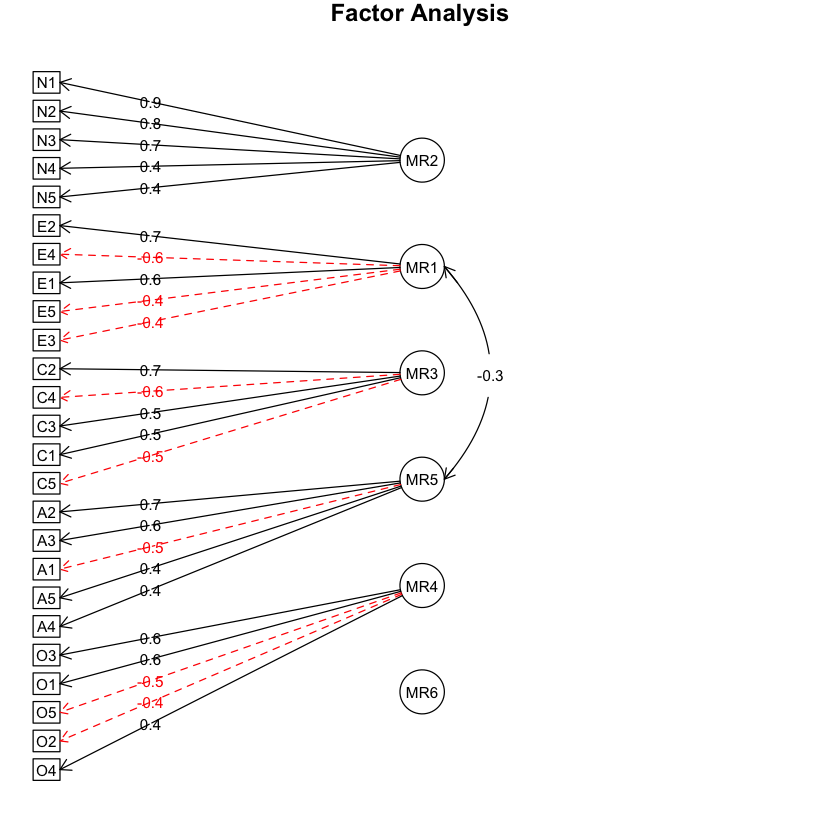

In [47]:
par(bg = 'white')
empiric_model <- fa(bfi_EFA, nfactors = 6)
fa.diagram(empiric_model)

## Using the wrapper function to set up a CFA

We can create our confirmatory factor analysis syntax from our empirical EFA model or from our theoretical model.

In [48]:
empiric_syn <- structure.sem(empiric_model)
empiric_syn

      Path        Parameter Value
 [1,] "MR5->A1"   "F4A1"    NA   
 [2,] "MR5->A2"   "F4A2"    NA   
 [3,] "MR5->A3"   "F4A3"    NA   
 [4,] "MR5->A4"   "F4A4"    NA   
 [5,] "MR5->A5"   "F4A5"    NA   
 [6,] "MR3->C1"   "F3C1"    NA   
 [7,] "MR3->C2"   "F3C2"    NA   
 [8,] "MR3->C3"   "F3C3"    NA   
 [9,] "MR3->C4"   "F3C4"    NA   
[10,] "MR6->C4"   "F6C4"    NA   
[11,] "MR3->C5"   "F3C5"    NA   
[12,] "MR1->E1"   "F2E1"    NA   
[13,] "MR1->E2"   "F2E2"    NA   
[14,] "MR1->E3"   "F2E3"    NA   
[15,] "MR4->E3"   "F5E3"    NA   
[16,] "MR1->E4"   "F2E4"    NA   
[17,] "MR1->E5"   "F2E5"    NA   
[18,] "MR2->N1"   "F1N1"    NA   
[19,] "MR2->N2"   "F1N2"    NA   
[20,] "MR2->N3"   "F1N3"    NA   
[21,] "MR2->N4"   "F1N4"    NA   
[22,] "MR1->N4"   "F2N4"    NA   
[23,] "MR2->N5"   "F1N5"    NA   
[24,] "MR4->O1"   "F5O1"    NA   
[25,] "MR4->O2"   "F5O2"    NA   
[26,] "MR6->O2"   "F6O2"    NA   
[27,] "MR4->O3"   "F5O3"    NA   
[28,] "MR1->O4"   "F2O4"    NA   
[29,] "MR4->O4

## Syntax Created From the Wrapper Function

>```
EFA_syn
Path        Parameter Value
[1,] "MR5->A1"   "F4A1"    NA

- Factor 4 (F4) = Factor MR5 from the EFA
  - Note that the wrapper function renames the factors (ex MR5 -> F4, MR2 -> F1, etc.).
- Examinees' level of a factor predicts item responses
  - The factor points to the item response because the factor determines the item response, not the other way around
- Wrapper function automatically names parameters
- NA Value = starting value chosen at random

## Creating CFA Syntax From Your Theory

In [49]:
# Set up syntax specifying which items load onto each factor

theory_syn_eq <- "
AGE: A1, A2, A3, A4, A5     #Agreeableness
CON: C1, C2, C3, C4, C5     #Conscientiousness
EXT: E1, E2, E3, E4, E5     #Extraversion
NEU: N1, N2, N3, N4, N5     #Neuroticism
OPE: O1, O2, O3, O4, O5     #Openness
"

- Short, memorable factor names
- Factor name followed by colon
- Items in a comma-separated list

In [50]:
theory_syn <- cfa(text = theory_syn_eq,
                  reference.indicators = FALSE)

NOTE: adding 25 variances to the model


In [51]:
theory_syn

   Path        Parameter   StartValue
1  AGE -> A1   lam[A1:AGE]           
2  AGE -> A2   lam[A2:AGE]           
3  AGE -> A3   lam[A3:AGE]           
4  AGE -> A4   lam[A4:AGE]           
5  AGE -> A5   lam[A5:AGE]           
6  CON -> C1   lam[C1:CON]           
7  CON -> C2   lam[C2:CON]           
8  CON -> C3   lam[C3:CON]           
9  CON -> C4   lam[C4:CON]           
10 CON -> C5   lam[C5:CON]           
11 EXT -> E1   lam[E1:EXT]           
12 EXT -> E2   lam[E2:EXT]           
13 EXT -> E3   lam[E3:EXT]           
14 EXT -> E4   lam[E4:EXT]           
15 EXT -> E5   lam[E5:EXT]           
16 NEU -> N1   lam[N1:NEU]           
17 NEU -> N2   lam[N2:NEU]           
18 NEU -> N3   lam[N3:NEU]           
19 NEU -> N4   lam[N4:NEU]           
20 NEU -> N5   lam[N5:NEU]           
21 OPE -> O1   lam[O1:OPE]           
22 OPE -> O2   lam[O2:OPE]           
23 OPE -> O3   lam[O3:OPE]           
24 OPE -> O4   lam[O4:OPE]           
25 OPE -> O5   lam[O5:OPE]           
26 AGE <-> A

### Factor-Variable Relationships

<img src='../images/chapter3 9.jpeg' />

### Factor Variances

<img src='../images/chapter3 10.jpeg' />

### Factor Covariances

<img src='../images/chapter3 11.jpeg' />

### Item Variances

<img src='../images/chapter3 12.jpeg' />

## Running the CFA

Actually running the CFA is *much* easier than setting up the syntax!


In [52]:
#Use the sem() function to run a CFA

theory_CFA <- sem(theory_syn, data = bfi_CFA)

Warning message in sem.semmod(theory_syn, data = bfi_CFA):
“-187 observations removed due to missingness”

In [53]:
summary(theory_CFA)


 Model Chisquare =  2137.188   Df =  265 Pr(>Chisq) = 1.876848e-289
 Goodness-of-fit index =  0.8597859
 RMSEA index =  0.07634851   90% CI: (NA, NA)
 Bentler CFI =  0.7957362
 BIC =  255.4627

 Normalized Residuals
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-6.8617 -0.4721  0.8173  1.0255  2.3680  9.3985 

 R-square for Endogenous Variables
    A1     A2     A3     A4     A5     C1     C2     C3     C4     C5     E1 
0.1273 0.4714 0.5554 0.2697 0.5052 0.3492 0.3945 0.3160 0.4838 0.3885 0.3038 
    E2     E3     E4     E5     N1     N2     N3     N4     N5     O1     O2 
0.4931 0.3902 0.4960 0.3352 0.6862 0.6616 0.5085 0.2907 0.2359 0.3211 0.1939 
    O3     O4     O5 
0.5043 0.0557 0.2080 

 Parameter Estimates
            Estimate   Std Error  z value    Pr(>|z|)                  
lam[A1:AGE] -0.5068896 0.04372110 -11.593707  4.435129e-31 A1 <--- AGE 
lam[A2:AGE]  0.8157603 0.03315738  24.602680 1.182447e-133 A2 <--- AGE 
lam[A3:AGE]  0.9938851 0.03642023  27.289370 5.671597e-

# Investigating Model Fit


## Default Fit Statistics

<img src='../images/chapter3 17.jpeg' />

### Changing the Options

- RMSEA < 0.05
- GFI (Goodness of Fit Index) > 0.90
- CFI (Comparative Fit Index) > 0.90

In [38]:
options(fit.indices = c("CFI", "GFI", "RMSEA", "BIC"))
summary(theory_CFA)


 Model Chisquare =  2233.972   Df =  265 Pr(>Chisq) = 6.080663e-308
 Goodness-of-fit index =  0.8516958
 RMSEA index =  0.0784916   90% CI: (NA, NA)
 Bentler CFI =  0.7802634
 BIC =  353.5601

 Normalized Residuals
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-6.3475 -0.4473  0.8182  1.0771  2.4706  9.5158 

 R-square for Endogenous Variables
    A1     A2     A3     A4     A5     C1     C2     C3     C4     C5     E1 
0.1381 0.4270 0.5227 0.2766 0.4727 0.2775 0.3428 0.2984 0.5263 0.4041 0.2999 
    E2     E3     E4     E5     N1     N2     N3     N4     N5     O1     O2 
0.4915 0.4006 0.5150 0.2809 0.6968 0.6504 0.5209 0.3308 0.2559 0.3216 0.2042 
    O3     O4     O5 
0.4833 0.0715 0.2382 

 Parameter Estimates
            Estimate   Std Error  z value    Pr(>|z|)                  
lam[A1:AGE] -0.5255707 0.04398038 -11.950116  6.483460e-33 A1 <--- AGE 
lam[A2:AGE]  0.7578294 0.03331691  22.746088 1.568836e-114 A2 <--- AGE 
lam[A3:AGE]  0.9386891 0.03645049  25.752440 3.026803e-1

## Absolute Model Fit

Note that in theory, our Chi square result should not be significanct, but in practice, this rarely happens.



>```
summary(theory_CFA)
Model Chisquare =  2305.159   Df =  271 Pr(>Chisq) = 0
Goodness-of-fit index =  0.8527977
RMSEA index =  0.07815051   90% CI: (NA, NA)
Bentler CFI =  0.7754574
```

## Relative Fit




>```
summary(theory_CFA)
BIC =  377.0563
```

In [54]:
summary(theory_CFA)$BIC

[1] 255.4627

In [56]:
# Run a CFA using the EFA syntax you created earlier
empiric_CFA <- sem(empiric_syn, data = bfi_CFA)

summary(empiric_CFA)$BIC

Warning message in sem.semmod(empiric_syn, data = bfi_CFA):
“-187 observations removed due to missingness”

[1] 231.8085